In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from math import ceil, floor
from matplotlib.colors import LogNorm


In [5]:
fits_filex='hlsp_frontier_model_abell2744_williams_v4_x-pixels-deflect.fits'
fits_filey='hlsp_frontier_model_abell2744_williams_v4_y-pixels-deflect.fits'
img_file='hlsp_frontier_model_abell2744_williams_v4_kappa.fits'
mag_file='hlsp_frontier_model_abell2744_williams_v4_z01-magnif.fits'

In [6]:
hdul = fits.open(fits_filex)
hdul1 = fits.open(fits_filey)
hdul_mag = fits.open(mag_file)
hdul_img = fits.open(img_file)


In [7]:
datax = hdul[0].data

datay = hdul1[0].data

data_img = hdul_img[0].data

array_data = np.zeros((datax.shape[0],datax.shape[1]))
array_data[100:160, 100:160]=datax[100:160, 100:160]

data_mag = hdul_mag[0].data
hdul.close()
hdul1.close()
hdul_img.close()


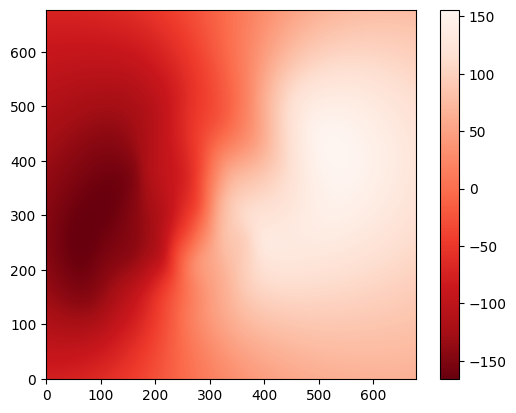

In [8]:


plt.imshow(datax, cmap='Reds_r')
plt.gca().invert_yaxis()
plt.colorbar()

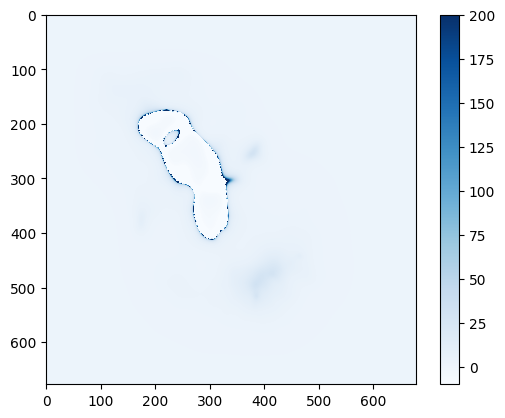

In [9]:
plt.imshow(data_mag, cmap='Blues',vmin=-10, vmax=200)

plt.colorbar()


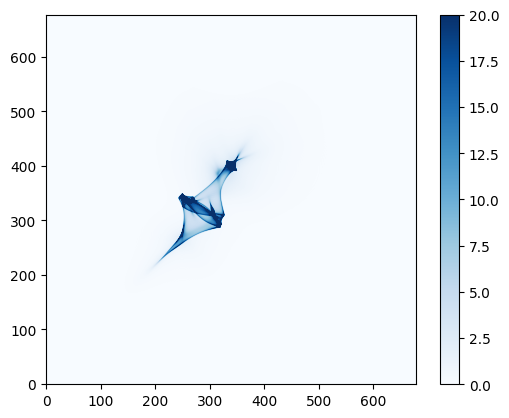

In [10]:
array_test = np.zeros((datax.shape[0],datax.shape[1]))
for i in range(0,678):
    for j in range(0,678):
        ycoord = i-datay[i,j]
        xcoord = j-datax[i,j]
        ydec = ycoord%1
        xdec = xcoord%1
        array_test[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        array_test[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        array_test[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test[floor(ycoord),floor(xcoord)] += data_img[i,j]*(1-ydec)*(1-xdec)

plt.imshow(array_test, cmap='Blues', vmax=20)
plt.colorbar()
plt.gca().invert_yaxis()

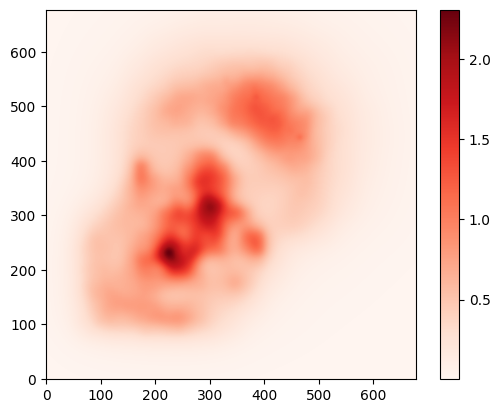

In [11]:
plt.imshow(data_img, cmap='Reds')
plt.colorbar()
plt.gca().invert_yaxis()

In [12]:
#checking the vaildity of the source plane map
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from lenstronomy.LensModel.convergence_integrals import deflection_from_kappa_grid 

# import the LensModel class #
from lenstronomy.LensModel.lens_model import LensModel

# specify the choice of lens models #
lens_model_list = ['SIE']

# setup lens model class with the list of lens models #
lensModel = LensModel(lens_model_list=lens_model_list)

# define parameter values of lens models #
kwargs_sie = {'theta_E': 100, 'e1':0, 'e2':0.4, 'center_x': 280, 'center_y': 320}
kwargs_lens = [kwargs_sie]
'''kwargs_epl = {'theta_E': 50, 'gamma': 2, 'e1': 0.1, 'e2': 0.1, 'center_x': 300, 'center_y': 300}
kwargs_lens = [kwargs_epl]'''
# image plane coordinate #
x_grid, y_grid = np.meshgrid(np.linspace(0, 679, 680), np.linspace(0, 679, 680))

# Flatten the grid for calculations
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()

# Calculate convergence (kappa)
kappa = lensModel.kappa(x_flat, y_flat, kwargs_lens)

# Reshape back to 2D grid
# kappa_2d = kappa.reshape(x_grid.shape)
# ray-tracing to the source plane
beta_x, beta_y = lensModel.ray_shooting(x_flat, y_flat, kwargs_lens)

# make beta_x and beta_y 2d
beta_x_2d = beta_x.reshape(x_grid.shape)
beta_y_2d = beta_y.reshape(x_grid.shape)
diffx= x_grid - beta_x_2d
diffy= y_grid - beta_y_2d


#plt.imshow(diffx, cmap='Blues')

#plt.colorbar()


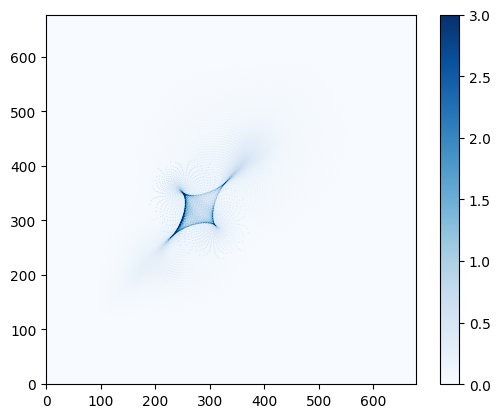

In [13]:
array_test2 = np.zeros((datax.shape[0],datax.shape[1]))
xcoords=[]
ycoords=[]
for i in range(0, 677):
    for j in range(0, 677):
      if i%3==0 and j%3==0:
        ycoord = i-diffy[i,j]
        xcoord = j-diffx[i,j]
        if ycoord<0 or ycoord>677 or xcoord<0 or xcoord>677:
            continue
        ydec = ycoord%1
        xdec = xcoord%1
        array_test2[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        array_test2[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        array_test2[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test2[floor(ycoord),floor(xcoord)] += data_img[i,j]*(1-ydec)*(1-xdec)
        xcoords.append(xcoord)
        ycoords.append(ycoord)

plt.imshow(array_test2, cmap='Blues',vmax=3)
plt.gca().invert_yaxis()
plt.colorbar()


In [14]:
from scipy.ndimage import distance_transform_edt as distance
'''# square ugly source
source_x = np.linspace(295, 304, 10)
source_y = np.linspace(315, 324, 10)
source_x, source_y = np.meshgrid(source_x, source_y)
source_x_1d = source_x.ravel()
source_y_1d = source_y.ravel()
# circle source
size = 680
radius = 7
center = [300,320]
# Create a 2D grid of points
x, y = np.meshgrid(np.arange(size), np.arange(size))

# Calculate the distance of each point from the center of the array
distances = distance((x - center[0])**2 + (y - center[1])**2)

# Create a binary mask where points inside the circle are 1 and points outside the circle are 0 given the center coordinates
circle = (distances < radius).astype(int)
circle_coords = np.argwhere(circle == 1)'''
print(distance([1,2,0]))
size = 678
mean = [300, 320]
cov = [[50, 0], [0, 50]]

# Generate a grid of (x, y) coordinates
x, y = np.meshgrid(np.linspace(0, size, size), np.linspace(0, size, size))

# Generate a 2D Gaussian distribution over the grid
d = np.dstack([x, y])
gaussian_circle = np.exp(-0.5 * (np.einsum('...k,kl,...l->...', d - mean, np.linalg.inv(cov), d - mean)))
circle_coords = np.argwhere(gaussian_circle > 0.2)


[2. 1. 0.]


(2, 1832, 1832) (678, 678)


(150.0, 450.0)

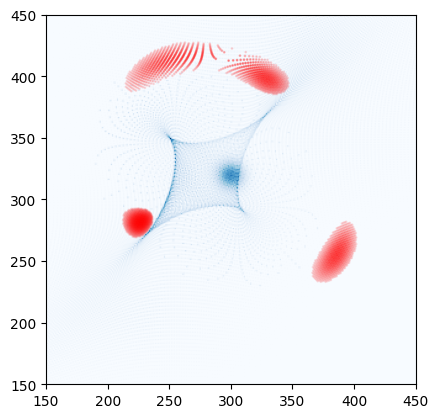

In [15]:
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver


# specifiy the lens model class to deal with #
solver = LensEquationSolver(lensModel)
image_x = []
image_y = []
intensity = []
for i in range(0, len(circle_coords)):
    x = circle_coords[i,1]
    y = circle_coords[i,0]
    theta_x, theta_y = solver.image_position_analytical(x=x, y=y, kwargs_lens=kwargs_lens)
    image_x.append(theta_x)
    image_y.append(theta_y)
    intensity.extend([gaussian_circle[y,x]]*len(theta_x))
    

'''image_x_sq = []
image_y_sq = []
for i in range(0, 10):
    for j in range(0, 10):
        x = source_x[i,j]
        y = source_y[i,j]
        theta_x, theta_y = solver.image_position_analytical(x=x, y=y, kwargs_lens=kwargs_lens)
        image_x_sq.append(theta_x)
        image_y_sq.append(theta_y)'''
        


# make image_x in a 1d array
image_x_1d = np.concatenate(image_x)
image_y_1d = np.concatenate(image_y)
image = np.array(np.meshgrid(image_x_1d, image_y_1d))

#using scatter plot for all maybe?
circle_graph = gaussian_circle * 5
intensity = np.array(intensity)
intensity_graph = intensity / 2
print(image.shape, circle_graph.shape)
plt.scatter(image_x_1d, image_y_1d, color='red', s=1, alpha=intensity_graph) 
graph = circle_graph + array_test2

plt.imshow(graph, cmap='Blues')

plt.gca().invert_yaxis()
plt.xlim(150,450)
plt.ylim(150,450)


(0.0, 600.0)

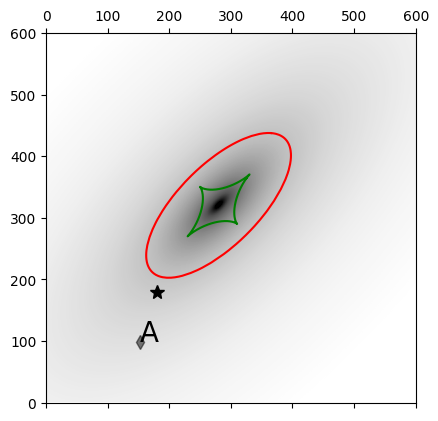

In [11]:
from lenstronomy.Plots import lens_plot

f, ax = plt.subplots()
src_x, src_y = 180,180

lens_plot.lens_model_plot(ax, lensModel=lensModel, kwargs_lens=kwargs_lens,numPix=5000, deltaPix=0.25, sourcePos_x=src_x, sourcePos_y=src_y, point_source=True, with_caustics=True, fast_caustic=True, coord_inverse=True)
# make the plot to have 679x679 pixels
plt.xlim(0,600)
plt.ylim(0,600)